# 基于 LeNet 的 FashionMNIST 数据集的分类
## LeNet
### 基本框架：
LeNet 主要由两个部分组成：
- 卷积层
- 全连接层

其基本机构如下：

输入：图片（$28\times 28$）
- $5\times 5$ 卷积层（6），填充为 2 （6@28*28）
- Sigmoid 函数激活
- $2\times 2$ 平均汇聚层，步幅为 2 （6@14*14）
- $5\times 5$ 卷积层（16） （16@10*10）
- Sigmoid 函数激活
- $2\times 2$ 平均汇聚层，步幅为 2 （16@5*5）
- Flatten 展平
- 全连接层（16\*5*5,120）
- Sigmoid 函数激活
- 全连接层（120，84）
- Sigmoid 函数激活
- 全连接层（84，10）
- softmax 函数分类输出

输出：10 个类别样本

In [1]:
# imports
import basic
from torch import nn
from torch import optim
import torch

class LeNet(basic.Net):
    def __init__(self):
        super(basic.Net).__init__()
        self.lenet()
    
    def lenet(self):
        self.net = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, padding=2),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2,stride=2),
            nn.Conv2d(6,16,kernel_size=5),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2,stride=2),
            nn.Flatten(),
            nn.Linear(16*5*5, 120),
            nn.Sigmoid(),
            nn.Linear(120,84),
            nn.Sigmoid(),
            nn.Linear(84,10))

['coat', 'sneaker', 'trouser', 'shirt']


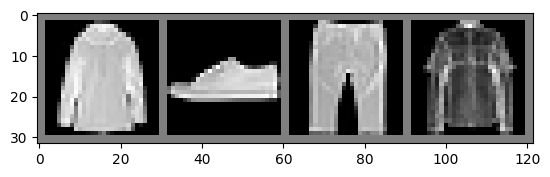

In [2]:
ROOT = "./data"
Model_PATH = "./model/lenet"
BatchSize = 128
optimizer = optim.SGD
criterion = nn.CrossEntropyLoss()

trains, tests, labels = basic.load_FashionMNIST_datasets(BatchSize,28,ROOT)
basic.show_some_samples(trains,labels)

In [3]:
lenet = LeNet()
lenet.train(trains,criterion,optimizer,epochs=5)
torch.save(lenet.net,Model_PATH)

Training on!


 20%|██        | 1/5 [00:10<00:40, 10.17s/it]

epoch 1, avg_loss: 2.3121709869458127



 40%|████      | 2/5 [00:18<00:28,  9.38s/it]

epoch 2, avg_loss: 2.3040349799343662



 60%|██████    | 3/5 [00:27<00:17,  8.88s/it]

epoch 3, avg_loss: 1.9023751313360329



 80%|████████  | 4/5 [00:35<00:08,  8.67s/it]

epoch 4, avg_loss: 1.1277528843309126



100%|██████████| 5/5 [00:43<00:00,  8.79s/it]

epoch 5, avg_loss: 0.9328018586095582
Finish Training!


In [4]:
lenet = LeNet()
lenet.try_gpu()
lenet.net =torch.load(Model_PATH,map_location = lenet.device)
lenet.accuracy(tests)
lenet.label_accuracy(tests,labels)

Total Accuracy:  68.6
Accuracy of t-shirt : 73 %
Accuracy of trouser : 84 %
Accuracy of pullover : 68 %
Accuracy of dress : 66 %
Accuracy of  coat : 40 %
Accuracy of sandal : 74 %
Accuracy of shirt : 16 %
Accuracy of sneaker : 82 %
Accuracy of   bag : 87 %
Accuracy of ankle boot : 92 %
